In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import pandas as pd
from numpy import linalg as LA
from matplotlib.pyplot import cm
from scipy.stats import multivariate_normal

In [50]:
post_stats_3 = pd.io.parsers.read_csv("3_posterior.csv",sep=",",index_col=0)

In [4]:
post_stats_3

,x
corr[1],0.262480
corr[2],0.401543
corr[3],0.111519
"cov[1,1,1]",0.003750
"cov[1,1,2]",0.005501
"cov[1,1,3]",0.003383
"cov[1,2,1]",0.002656
"cov[1,2,2]",0.002085
"cov[1,2,3]",0.001611
"cov[2,1,1]",0.002656


In [5]:
df = pd.io.parsers.read_csv("data_with_coordinates.csv",sep=",",index_col=0)
df = df.dropna(subset=['census_tract'])
df.shape

(88752, 51)

In [136]:
N = 10000
coord_df = df[["Latitude", "Longitude"]]
coord_df = coord_df.head(N)
coord_df.shape

(10000, 2)

In [154]:
def plot_ellipse(coord_df, post_stats, K, fname):
    color = iter(cm.Set2(np.linspace(0, 1, K)))
    for k in range(1,K+1):
        cov_names = ["cov[" + str(i) + ","+ str(j) + "," + str(k) + "]" for i in range(1,3) for j in range(1,3)]
        cov = np.array(post_stats.loc[cov_names]['x'])
        cov = np.reshape(cov,[2,2])
        mu_x = post_stats.loc['muOfGaussian['+str(k)+',1]']['x']
        mu_y = post_stats.loc['muOfGaussian['+str(k)+',2]']['x']

        lambda_, v = np.linalg.eig(cov)
        lambda_ = np.sqrt(lambda_)
        ax = plt.subplot(111)
        c = next(color)
        for j in range(3,4):
            ell = Ellipse(xy=(mu_x, mu_y),
                          width=lambda_[0]*j*2, height=lambda_[1]*j*2,
                          angle=np.rad2deg(np.arccos(v[0, 0])),color=c)
            ell.set_facecolor('none')
            ax.add_artist(ell)

    plt.scatter(coord_df["Latitude"], coord_df["Longitude"],s=0.05,c="pink")
#     plt.show()
    plt.savefig(fname, dpi = 300)

<ipython-input-145-5ee9ce09665c>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


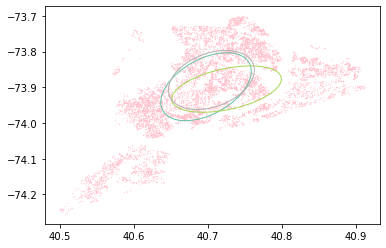

In [146]:
plot_ellipse(coord_df, post_stats_3, 3, "3mixture.png")

<ipython-input-152-1db23da65987>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


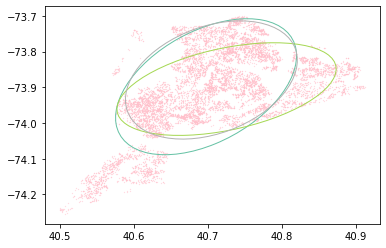

In [153]:
plot_ellipse(coord_df, post_stats_3, 3, "3mixture_95.png")

<ipython-input-154-4810907b0f19>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


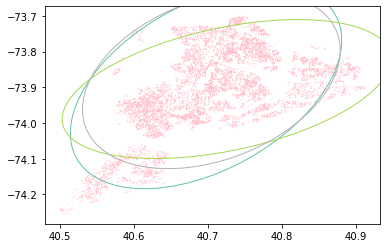

In [155]:
plot_ellipse(coord_df, post_stats_3, 3, "3mixture_99.png")

<ipython-input-145-5ee9ce09665c>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


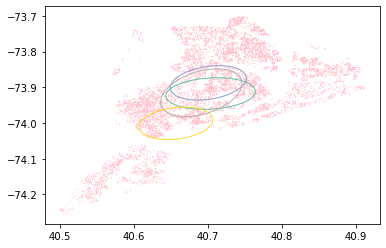

In [147]:
post_stats_4 = pd.io.parsers.read_csv("4_posterior.csv",sep=",",index_col=0)
plot_ellipse(coord_df, post_stats_4, 4, "4mixture.png")

<ipython-input-145-5ee9ce09665c>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


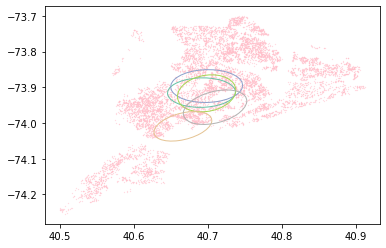

In [148]:
post_stats_5 = pd.io.parsers.read_csv("5_posterior.csv",sep=",",index_col=0)
plot_ellipse(coord_df, post_stats_5, 5, "5mixture.png")

<ipython-input-145-5ee9ce09665c>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


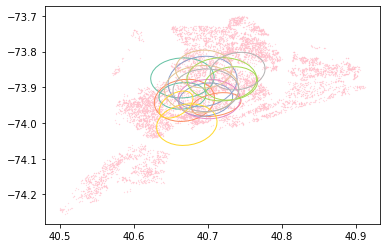

In [149]:
post_stats_15 = pd.io.parsers.read_csv("15_posterior.csv",sep=",",index_col=0)
plot_ellipse(coord_df, post_stats_15, 15, "15mixture.png")

<ipython-input-145-5ee9ce09665c>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


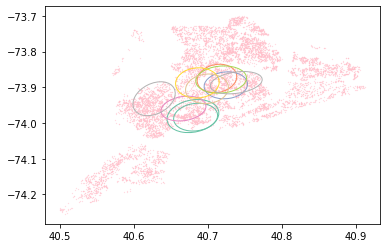

In [150]:
post_stats_10 = pd.io.parsers.read_csv("10_posterior.csv",sep=",",index_col=0)
plot_ellipse(coord_df, post_stats_10, 10, "10mixture.png")

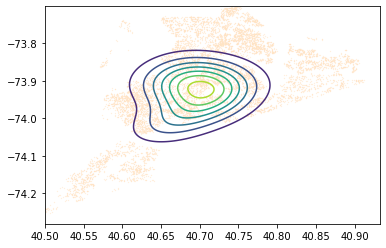

In [156]:
plot_contour(coord_df, post_stats_5, 5, "5contour.png")

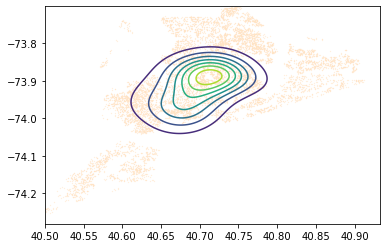

In [151]:
plot_contour(coord_df, post_stats_10, 10, "10contour.png")

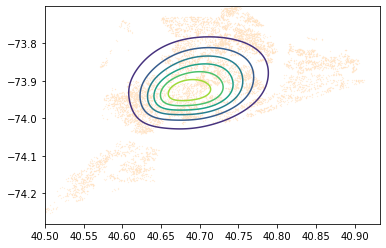

In [157]:
plot_contour(coord_df, post_stats_15, 15, "15contour.png")

In [72]:
# rv.pdf(pos).shape
x.shape
y.shape
rv_val = np.zeros(x.shape)
rv_val += rv.pdf(pos)
rv_val

array([[2.74294173e-02, 2.80532149e-02, 2.86872023e-02, ...,
        6.84017674e-05, 6.52777713e-05, 6.22877744e-05],
       [2.84486635e-02, 2.90985111e-02, 2.97590573e-02, ...,
        7.45085279e-05, 7.11126431e-05, 6.78620790e-05],
       [2.94958561e-02, 3.01726010e-02, 3.08605737e-02, ...,
        8.11331792e-05, 7.74430014e-05, 7.39103670e-05],
       ...,
       [1.74059056e-07, 1.85127814e-07, 1.96873029e-07, ...,
        1.23315204e-01, 1.22383709e-01, 1.21442333e-01],
       [1.57950575e-07, 1.68011536e-07, 1.78688456e-07, ...,
        1.17526171e-01, 1.16649912e-01, 1.15764060e-01],
       [1.43284644e-07, 1.52426468e-07, 1.62128970e-07, ...,
        1.11971217e-01, 1.11147340e-01, 1.10314156e-01]])

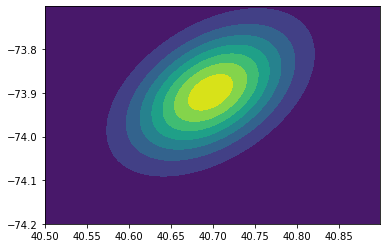

In [57]:
x, y = np.mgrid[40.5:40.9:.001, -74.2:-73.7:.001]
pos = np.dstack((x, y))
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))

In [114]:
def plot_contour(coord_df, post_stats, K, fname):
    color = iter(cm.Set2(np.linspace(0, 1, K)))
    x, y = np.mgrid[40.5:40.9:.001, -74.2:-73.7:.001]
    pos = np.dstack((x, y))
    rv_val = np.zeros(x.shape)
    for k in range(1,K+1):
        cov_names = ["cov[" + str(i) + ","+ str(j) + "," + str(k) + "]" for i in range(1,3) for j in range(1,3)]
        cov = np.array(post_stats.loc[cov_names]['x'])
        cov = np.reshape(cov,[2,2])
        mu_x = post_stats.loc['muOfGaussian['+str(k)+',1]']['x']
        mu_y = post_stats.loc['muOfGaussian['+str(k)+',2]']['x']
        pk = post_stats.loc['pk['+str(k)+']']['x']
        rv = multivariate_normal([mu_x, mu_y], cov)
        rv_val += pk * rv.pdf(pos)

    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    ax2.contour(x, y, rv_val)
    plt.scatter(coord_df["Latitude"], coord_df["Longitude"],s=0.05,c="bisque")
    plt.savefig(fname, dpi=300)